In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


Replicate 8aug
=====

We saw this score a very respectable 0.75 on `check_test_score.py`, but then repeating this test later could not reproduce the score.

In [3]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/replicate_8aug.pkl")

In [5]:
print(m)

h1
	Input space: Conv2DSpace(shape=(48, 48), num_channels=1, axes=('b', 0, 1, 'c'), dtype=float32)
	Total input dimension: 2304
h2
	Input space: Conv2DSpace(shape=(21, 21), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 21168
h3
	Input space: Conv2DSpace(shape=(9, 9), num_channels=96, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 7776
h4
	Input space: Conv2DSpace(shape=(11, 11), num_channels=128, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 15488
h5
	Input space: Conv2DSpace(shape=(7, 7), num_channels=128, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 6272
y
	Input space: VectorSpace(dim=1024, dtype=float32)
	Total input dimension: 1024


In [6]:
nll_channels = [c for c in m.monitor.channels.keys() if 'nll' in c]

In [7]:
import neukrill_net.plotting as pl

Train_y_nll
      I : Curve.Train_y_nll   (y)
   Valid_y_nll
      I : Curve.Valid_y_nll   (y)
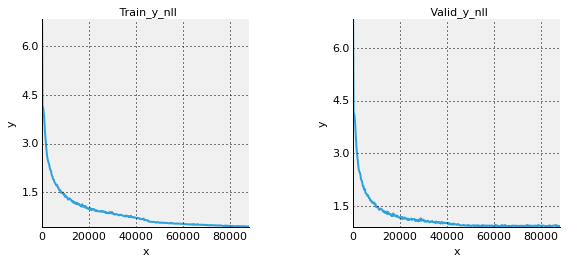

In [10]:
pl.monitor_channels(m, nll_channels, x_axis='time')

In [11]:
24*60*60

86400

In [13]:
%run ~/repos/pylearn2/pylearn2/scripts/print_monitor.py /disk/scratch/neuroglycerin/models/replicate_8aug_recent.pkl

epochs seen:  500
time trained:  116198.584227
learning_rate : 0.00246499781497
momentum : 0.950000703335
total_seconds_last_epoch : 234.423736572
train_h1_kernel_norms_max : 1.93650114536
train_h1_kernel_norms_mean : 1.11308705807
train_h1_kernel_norms_min : 0.288871735334
train_h1_max_x_max_u : 21.2930374146
train_h1_max_x_mean_u : 3.37690377235
train_h1_max_x_min_u : 0.0281044077128
train_h1_mean_x_max_u : 6.79862976074
train_h1_mean_x_mean_u : 0.561039626598
train_h1_mean_x_min_u : 0.00111330486834
train_h1_min_x_max_u : 1.32200133801
train_h1_min_x_mean_u : 0.0251323096454
train_h1_min_x_min_u : 0.0
train_h1_range_x_max_u : 21.2657623291
train_h1_range_x_mean_u : 3.35177087784
train_h1_range_x_min_u : 0.0278045255691
train_h2_kernel_norms_max : 1.93650114536
train_h2_kernel_norms_mean : 1.92801177502
train_h2_kernel_norms_min : 1.78207170963
train_h2_max_x_max_u : 35.5317726135
train_h2_max_x_mean_u : 7.22665548325
train_h2_max_x_min_u : 0.0
train_h2_mean_x_max_u : 7.86044692993
t

40aug
===

This currently produced our best score on the leaderboard, can reproduce a `check_test_score` of 0.73. Trying to run it again to improve on its score we want to know how long an epoch takes, because it seems like it's taking far too long now:

In [14]:
%run ~/repos/pylearn2/pylearn2/scripts/print_monitor.py /disk/scratch/neuroglycerin/models/alexnet_based_40aug.pkl

epochs seen:  17
time trained:  60084.537869
learning_rate : 0.0336977280676
momentum : 0.799990355968
total_seconds_last_epoch : 3460.70043945
train_h1_kernel_norms_max : 1.93638002872
train_h1_kernel_norms_mean : 1.35616624355
train_h1_kernel_norms_min : 0.596906483173
train_h1_max_x_max_u : 13.6937503815
train_h1_max_x_mean_u : 3.1057240963
train_h1_max_x_min_u : 0.0213607456535
train_h1_mean_x_max_u : 2.93430781364
train_h1_mean_x_mean_u : 0.595335006714
train_h1_mean_x_min_u : 0.00120134581812
train_h1_min_x_max_u : 1.22280919552
train_h1_min_x_mean_u : 0.0397124737501
train_h1_min_x_min_u : 0.0
train_h1_range_x_max_u : 13.6927280426
train_h1_range_x_mean_u : 3.06600475311
train_h1_range_x_min_u : 0.0213216785342
train_h2_kernel_norms_max : 1.93638002872
train_h2_kernel_norms_mean : 1.92026364803
train_h2_kernel_norms_min : 1.53414034843
train_h2_max_x_max_u : 26.5702266693
train_h2_max_x_mean_u : 5.99680089951
train_h2_max_x_min_u : 0.0
train_h2_mean_x_max_u : 6.19980716705
train

In [16]:
60084.537869/(17*60)

58.906409675490195

In [17]:
m = pylearn2.utils.serial.load(
        "/disk/scratch/neuroglycerin/models/alexnet_based_40aug.pkl")

Train_y_nll
      I : Curve.Train_y_nll   (y)
   Valid_y_nll
      I : Curve.Valid_y_nll   (y)
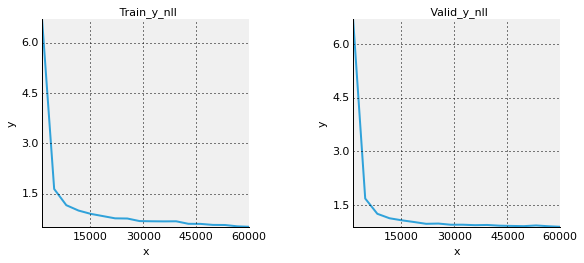

In [18]:
pl.monitor_channels(m, nll_channels, x_axis='time')

Curve.Learning_rate   (y)
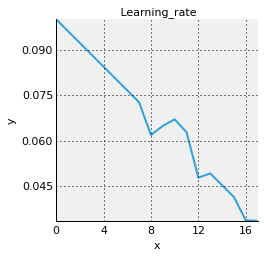

In [22]:
pl.monitor_channels(m,['learning_rate'], x_axis='epoch')

Continuing 40aug
--------------

Tried continuing this model with a different learning rate schedule.

In [23]:
m = pylearn2.utils.serial.load(
        "/disk/scratch/neuroglycerin/models/resume_40aug_recent.pkl")

Train_y_nll
      I : Curve.Train_y_nll   (y)
   Valid_y_nll
      I : Curve.Valid_y_nll   (y)
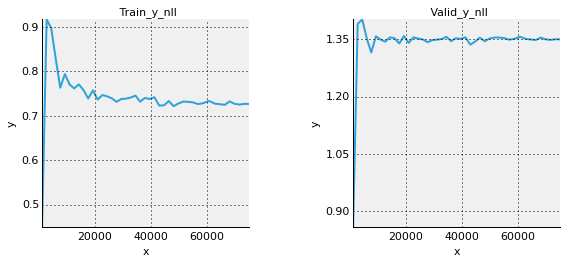

In [24]:
pl.monitor_channels(m, nll_channels, x_axis='time')

Curve.Learning_rate   (y)
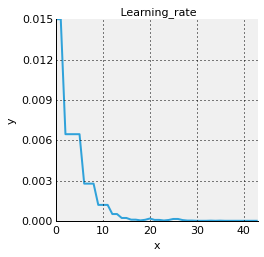

In [25]:
pl.monitor_channels(m,['learning_rate'], x_axis='epoch')

Looks like something about the model is definitely broken.

Replicate 8aug with LR tuning
==========

These settings were badly written, and I didn't check just after starting it, so it was very unlikely to work, but might as well look at how bad it was:

In [26]:
m = pylearn2.utils.serial.load(
        "/disk/scratch/neuroglycerin/models/replicate_8aug_lrschedule.pkl")

Train_y_nll
      I : Curve.Train_y_nll   (y)
   Valid_y_nll
      I : Curve.Valid_y_nll   (y)
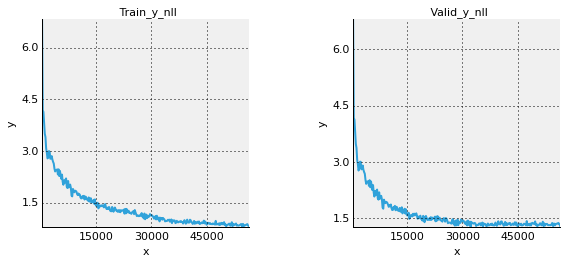

In [27]:
pl.monitor_channels(m, nll_channels, x_axis='time')

Validation score failed to reach anywhere what it manages above, with only a slight change to the learning rate schedule. Could be something else is going wrong somewhere. Could try rolling back changes to the state we were at when running replicate 8aug originally.